In [1]:
# pip install pandas-datareader
# pip install plotly
# pip install openai
# pip install os-sys
# pip install mplfinance
# pip install langchain

In [1]:
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import os
import plotly.graph_objects as go
import mplfinance as mpf

In [2]:
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

In [3]:
start = dt.datetime(2012, 1, 1)
end = dt.datetime(2017, 12, 31)

df = pdr.get_data_yahoo('TSLA',start,end)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000


In [5]:
df.to_csv("tsla.csv")

In [6]:
df = pd.read_csv("tsla.csv",parse_dates=True, index_col=0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000


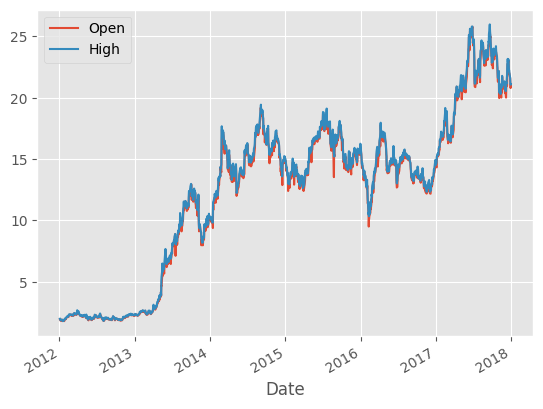

In [5]:
style.use('ggplot')
df[['Open','High']].plot()
plt.show()

In [6]:
df['100ma'] = df['Close'].rolling(window = 100, min_periods = 0).mean() #Moving Average with a sliding window of 100. min_periods is used for first 100 days so that it doesn't produce NaN.

In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500,1.872000
2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500,1.859666
2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500,1.842444
2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500,1.830333
2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000,1.827600


In [8]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2017-12-22,21.967333,22.061333,21.654667,21.680000,21.680000,63237000,22.586700
2017-12-26,21.588667,21.596001,21.105333,21.152666,21.152666,65676000,22.566833
2017-12-27,21.066668,21.178667,20.716667,20.775999,20.775999,70681500,22.536653
2017-12-28,20.783333,21.054667,20.636000,21.024000,21.024000,64744500,22.510113
2017-12-29,21.078667,21.094000,20.666668,20.756666,20.756666,56658000,22.474200


In [9]:
df_new = df['Close'].resample('10D').ohlc() #Resampling the data of 10 days
df_volume = df['Volume'].resample('10D').sum() #Resampling the data of 10 days for volume

In [10]:
df_new.head()

,open,high,low,close
Date,,,,
2012-01-03,1.872000,1.883333,1.794000,1.883333
2012-01-13,1.519333,1.787333,1.519333,1.773333
2012-01-23,1.784667,1.972000,1.784667,1.972000
2012-02-02,2.016667,2.172000,2.016667,2.073333
2012-02-12,2.099333,2.331333,2.099333,2.300000


In [11]:
df_volume.head()

Date
2012-01-03     97806000
2012-01-13    199812000
2012-01-23     94378500
2012-02-02    105283500
2012-02-12    156940500
Freq: 10D, Name: Volume, dtype: int64

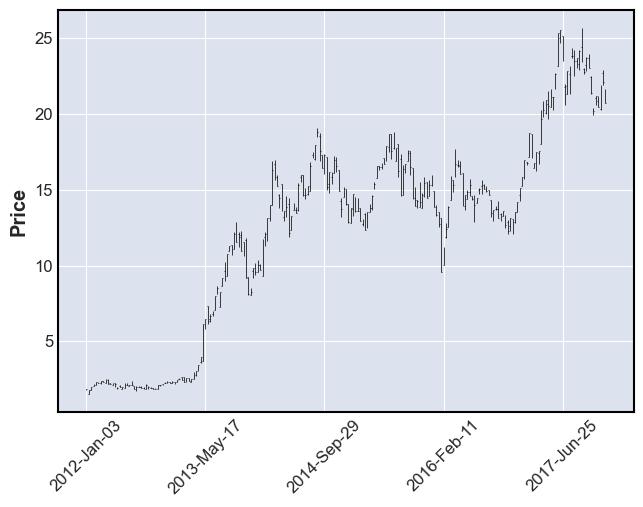

In [12]:
mpf.plot(df_new)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


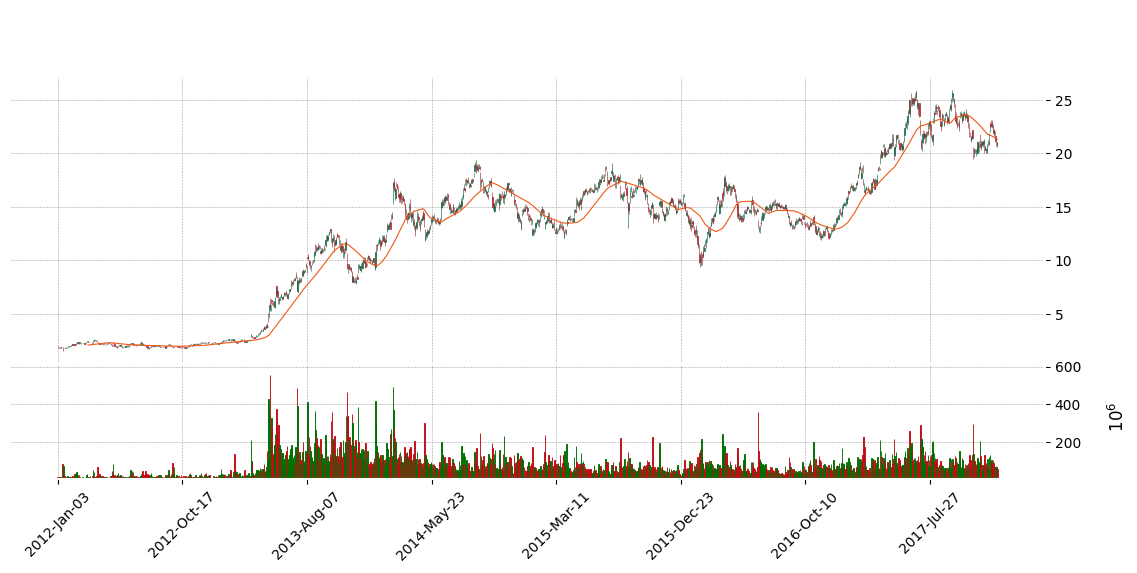

In [13]:
mpf.plot(df, type='candle', style='charles',
            title='  ',
            ylabel='  ',
            ylabel_lower='  ',
            figratio=(25,10),
            figscale=1,
            mav=50,
            volume=True
            )

In [14]:
df.reset_index(inplace = True)

In [15]:
hovertext=[]
for i in range(len(df['Open'])):
    hovertext.append('Open: '+str(df['Open'][i])+'<br>Close: '+str(df['Close'][i]))  #Used for displaying the open and close price when the user hovers on the data.

In [16]:
fig = go.Figure(data=go.Ohlc(x=df['Date'],
                    open=df['Open'],
                    high=df['High'],
                    low=df['Low'],
                    close=df['Close'],
                    text=hovertext,
                    hoverinfo='text'))
fig.show()